# Feature Engineering

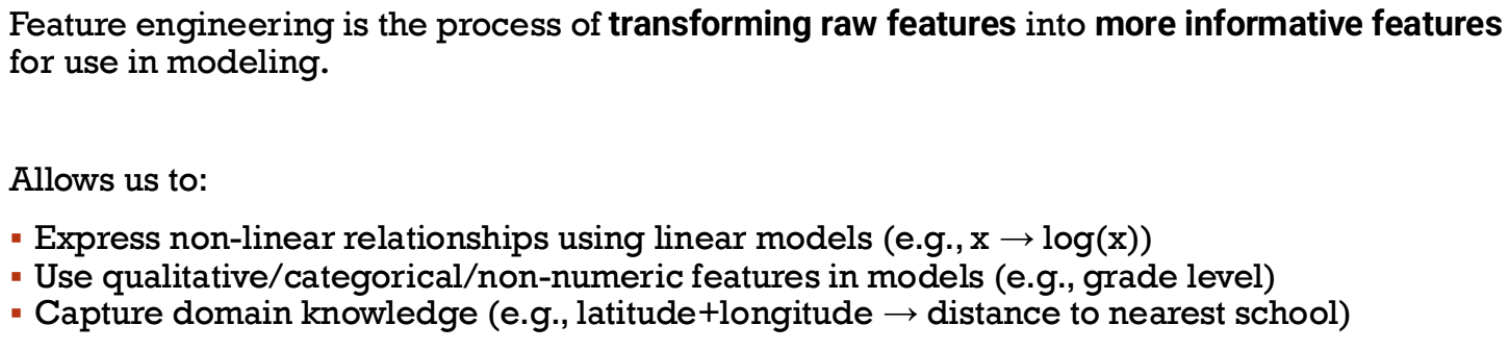

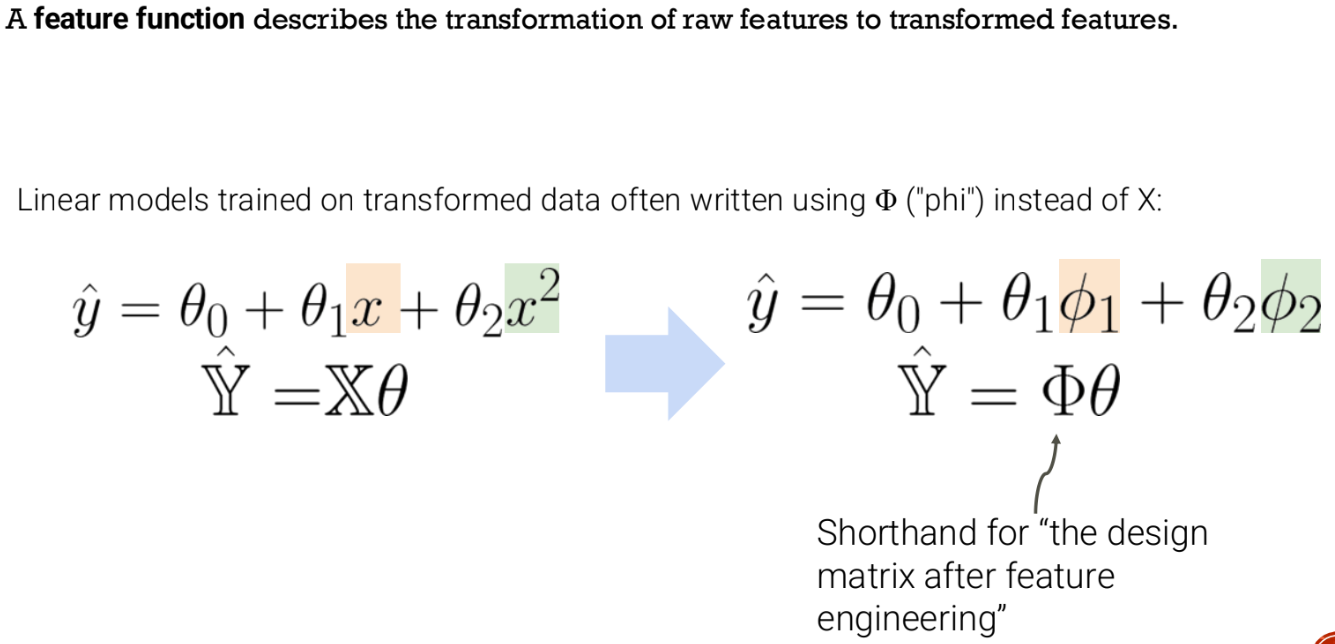

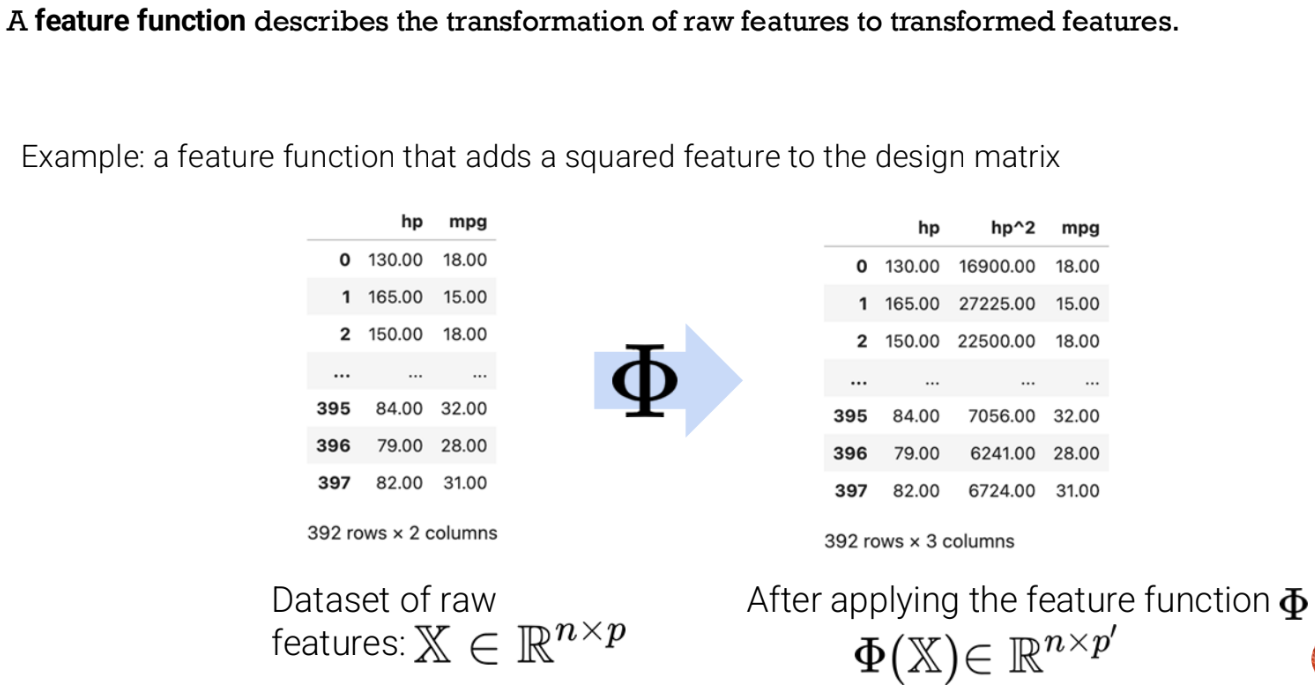

## One-Hot Encoding

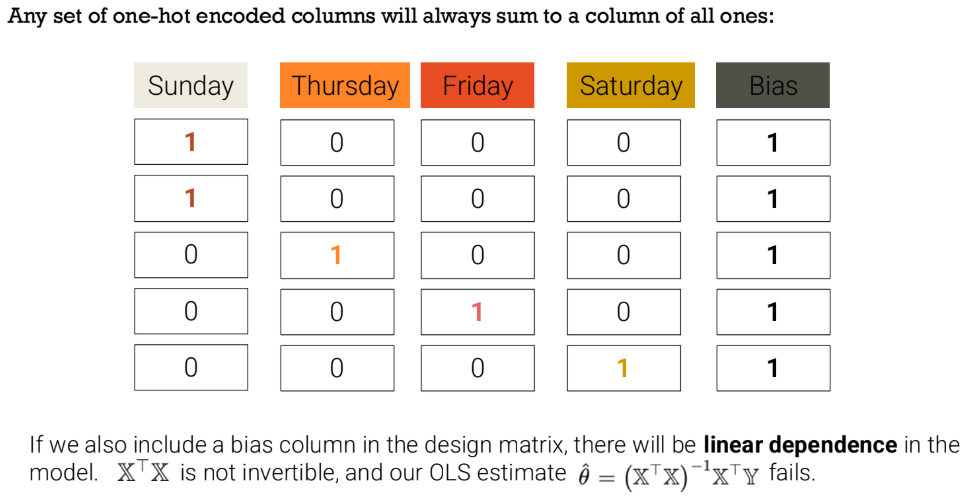

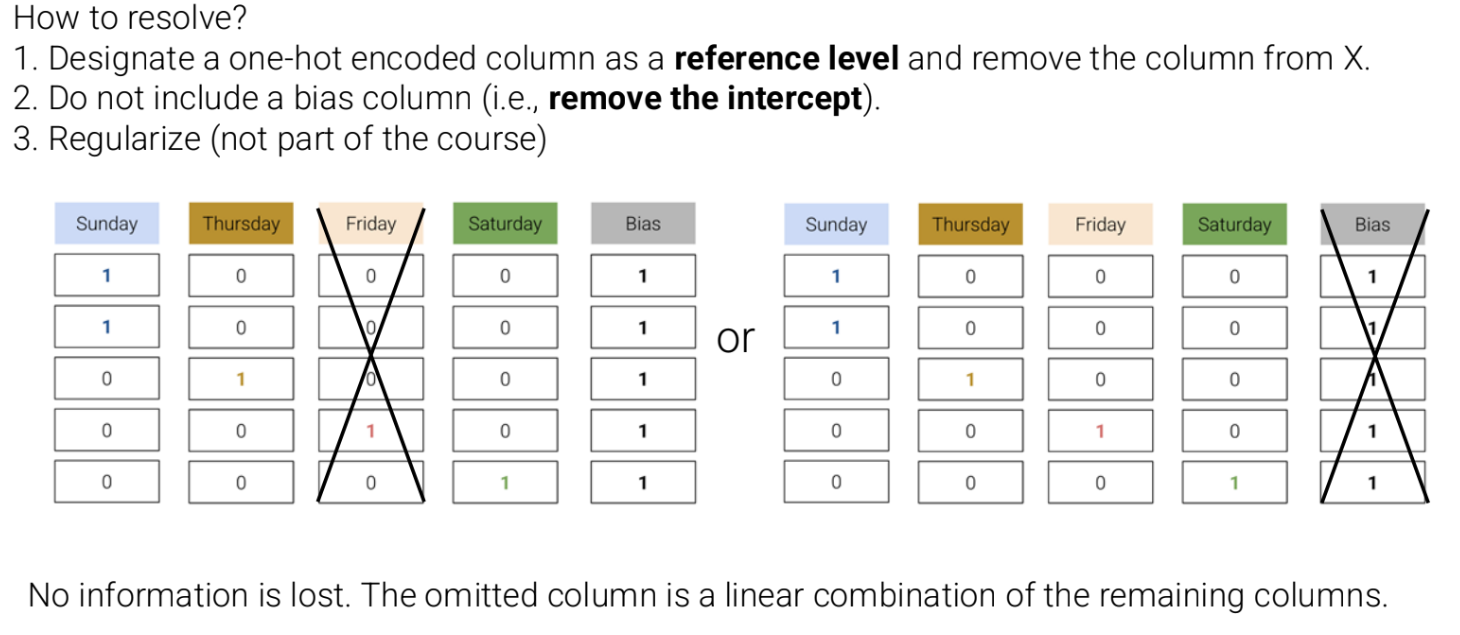

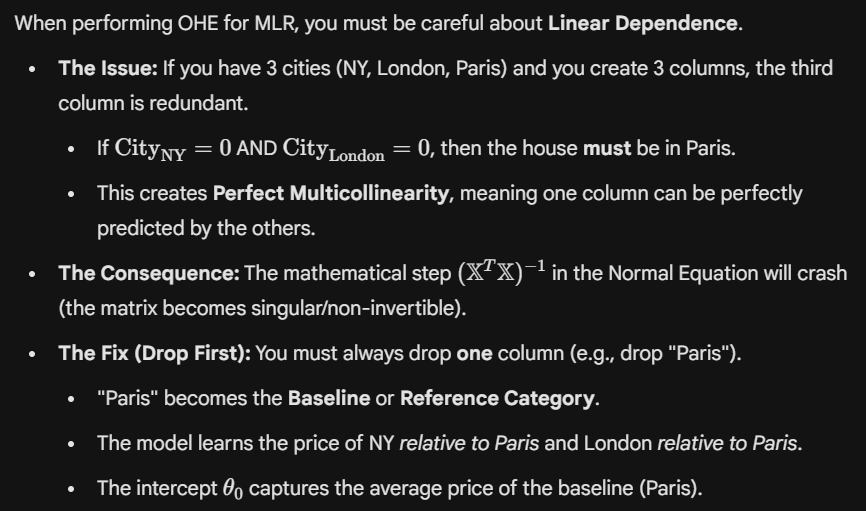

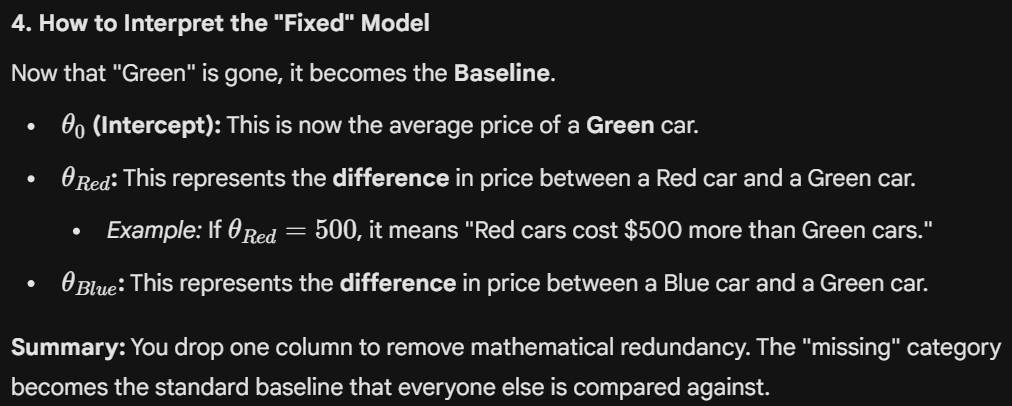

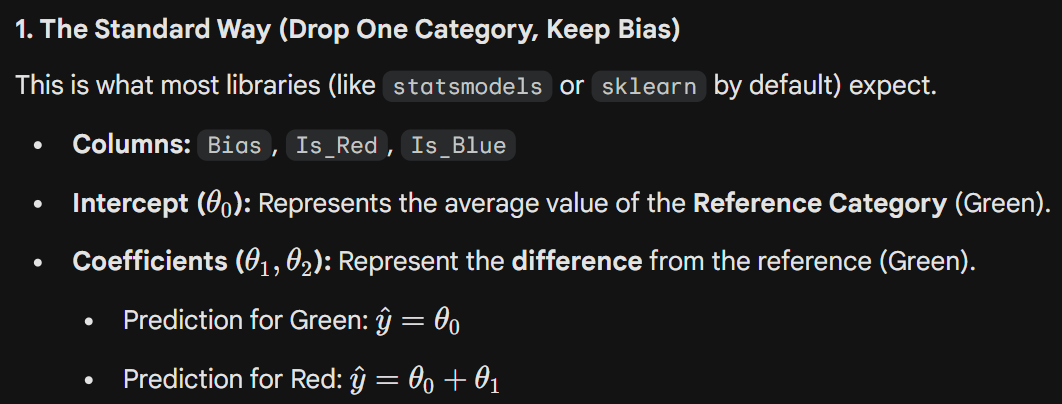

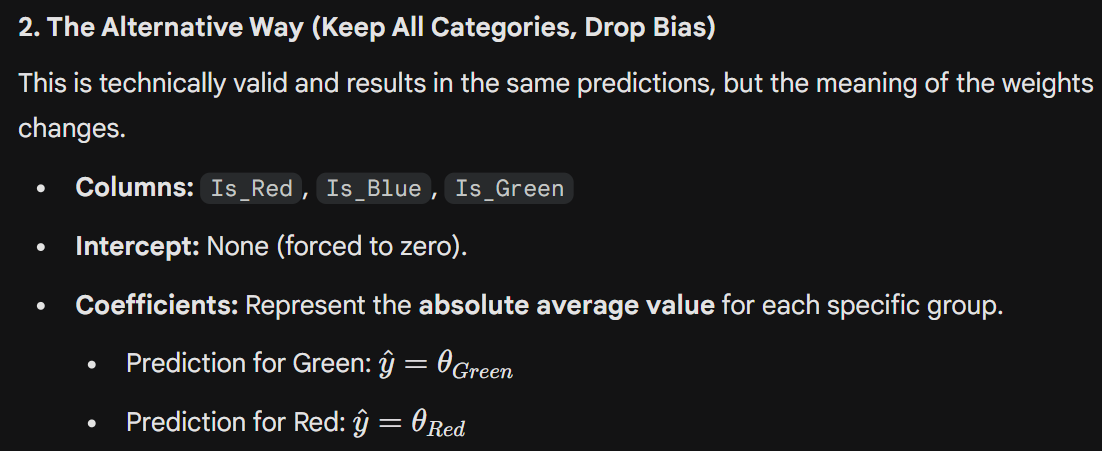

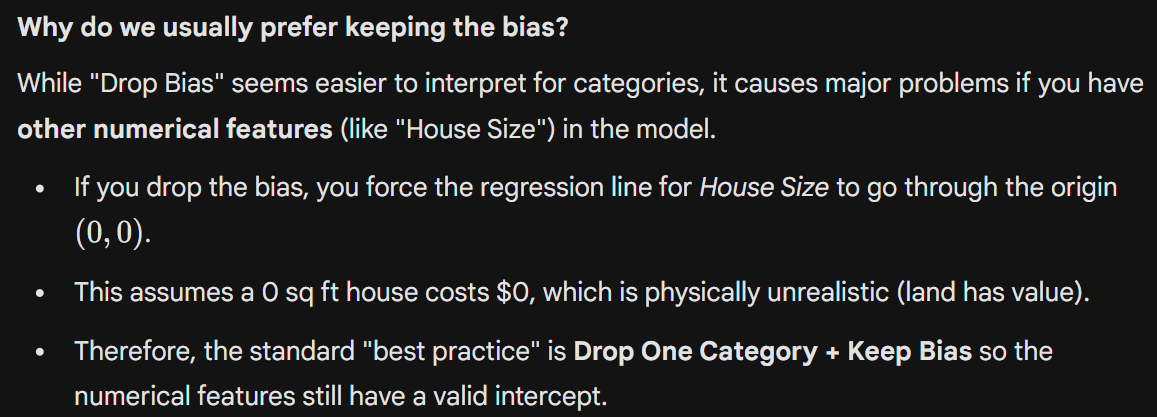

# Polynomial Regression

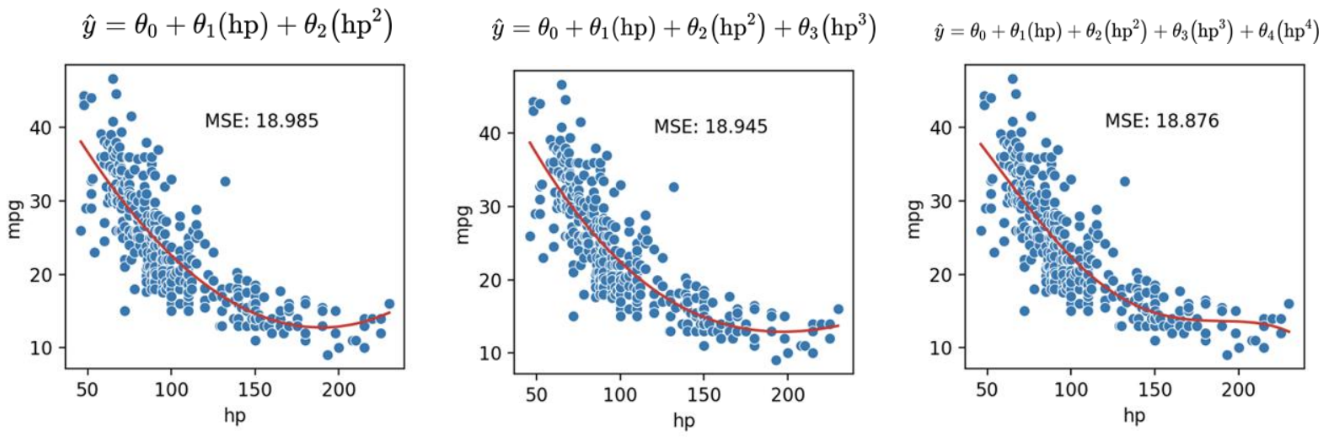

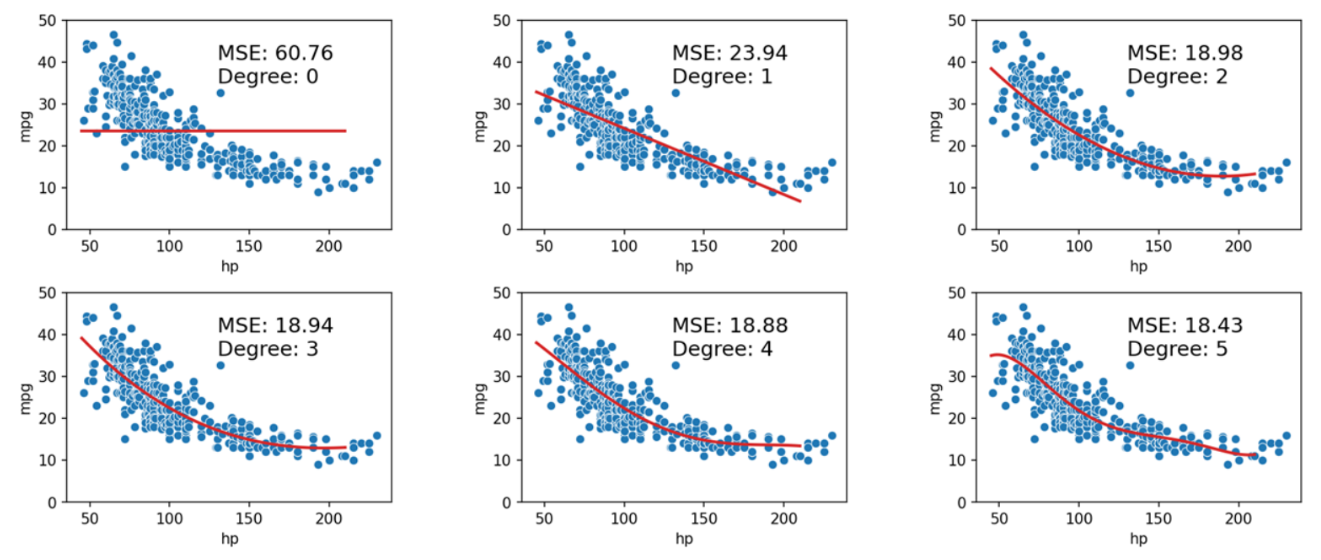

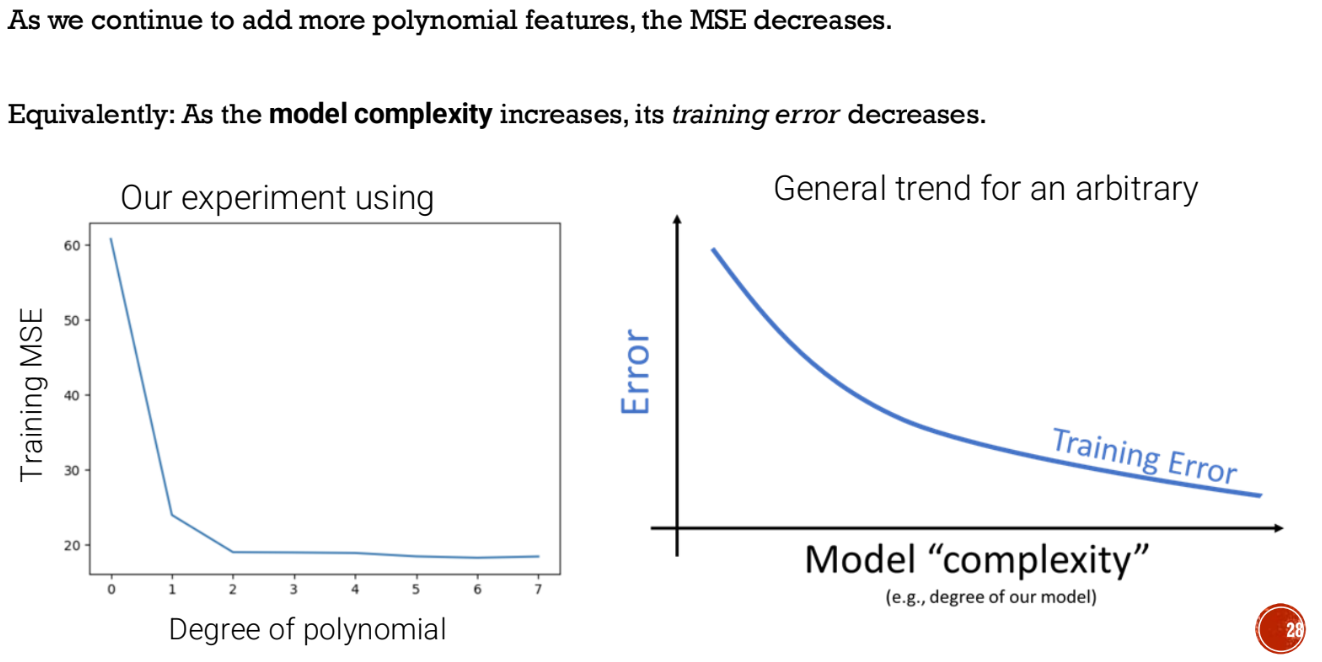

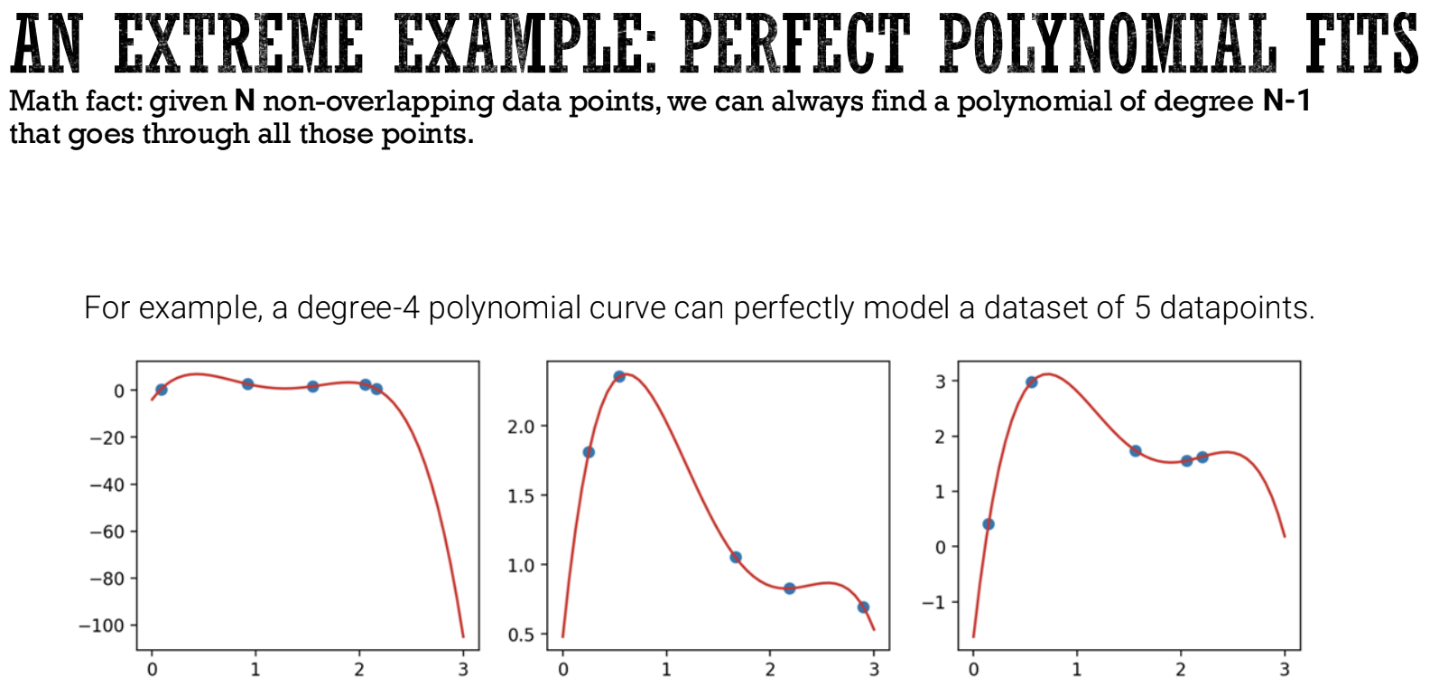

## Overfitting

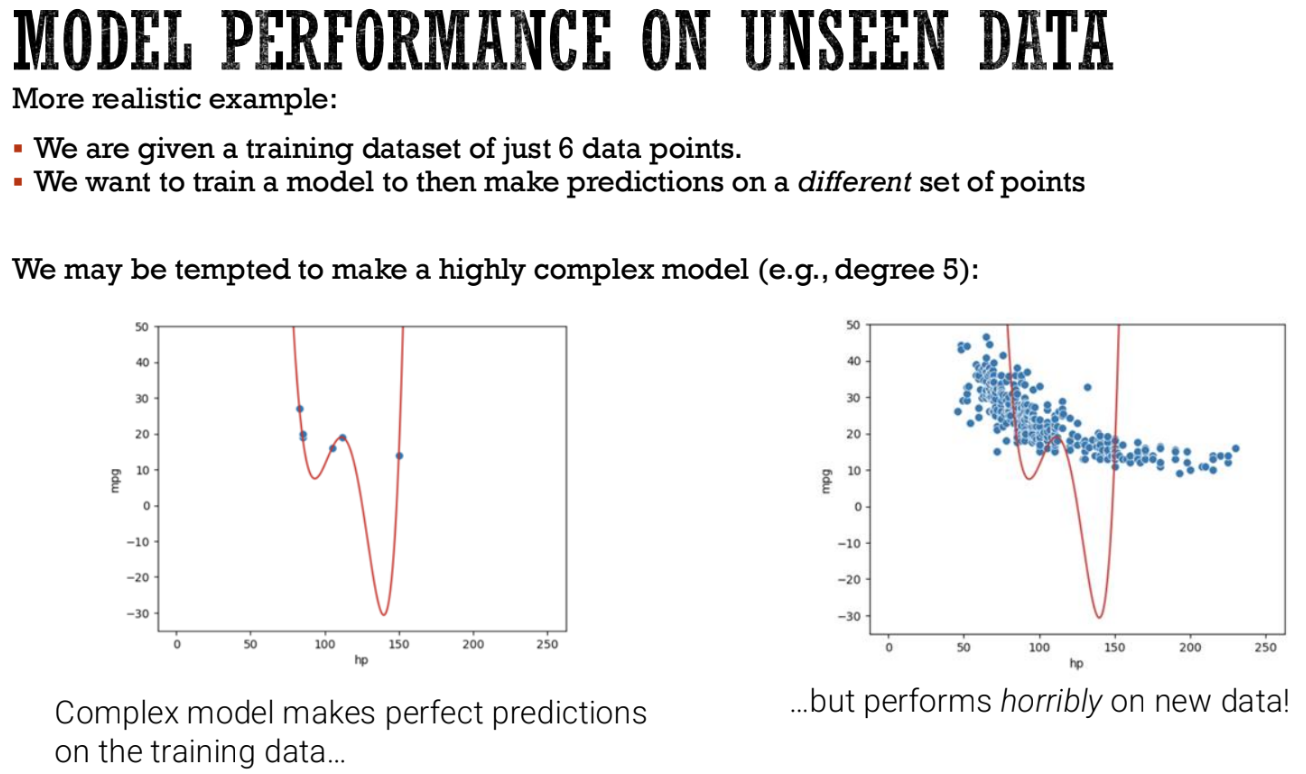

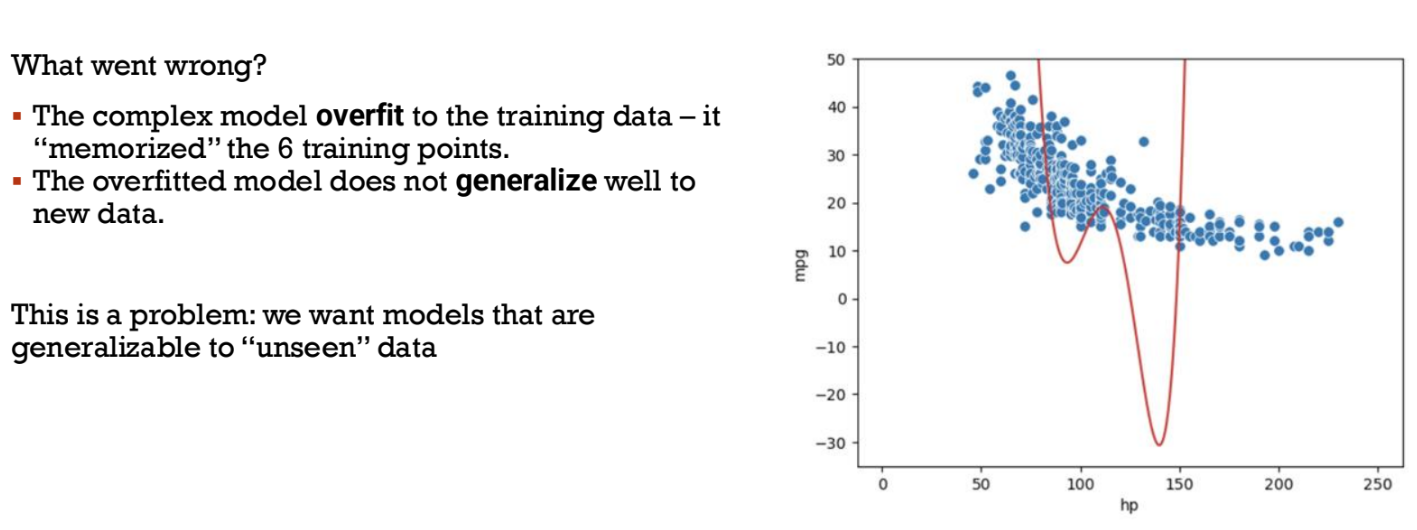

## Model, Variance, & Complexity

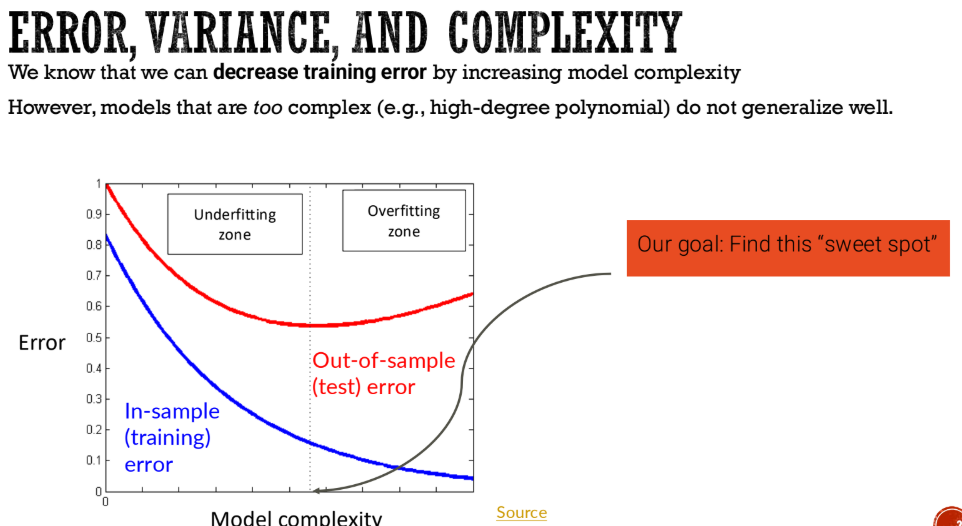

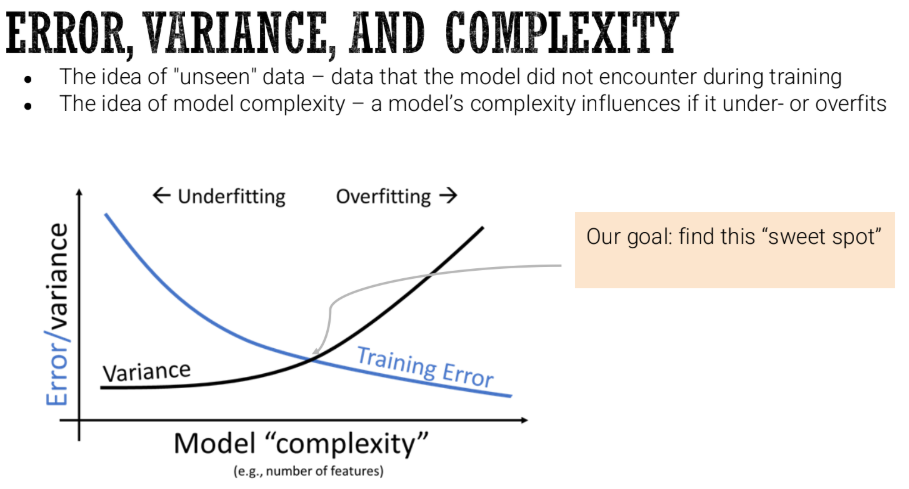

# Code

## MLR with One-Hot Encoding

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# --- 1. Create Synthetic Data ---
# We have House Size (Numeric) and Neighborhood (Categorical)
data = {
    'Size_SqFt': [1500, 1500, 1500, 2500, 2500, 2500],
    'Neighborhood': ['Rural', 'Suburb', 'Downtown', 'Rural', 'Suburb', 'Downtown'],
    # Logic:
    # Base Price (Rural) = $100k + ($100 * Size)
    # Suburb Premium = +$50k
    # Downtown Premium = +$100k
    'Price': [250000, 300000, 350000, 350000, 400000, 450000]
}
df = pd.DataFrame(data)

print("--- Original Data ---")
print(df)
print("-" * 30)

# --- 2. One Hot Encoding (The Crucial Step) ---
# drop_first=True removes the first category (alphabetically 'Downtown')
# This avoids the Dummy Variable Trap.
df_encoded = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True, dtype=int)

print("--- Encoded Data (Ready for MLR) ---")
print(df_encoded)
print("-" * 30)

# --- 3. Define Features (X) and Target (y) ---
X = df_encoded.drop(columns=['Price'], axis=1) # Features: Size, Neighborhood_Rural, Neighborhood_Suburb
y = df_encoded['Price']

# --- 4. Fit the Model ---
model = LinearRegression()
model.fit(X, y)

# --- 5. Extract and Interpret Coefficients ---
intercept = model.intercept_
coefs = model.coef_
feature_names = X.columns

print("--- Model Results ---")
print(f"Intercept (Baseline): ${intercept:,.2f}")

for name, val in zip(feature_names, coefs):
    print(f"Coefficient for {name}: ${val:,.2f}")

print("-" * 30)
print("INTERPRETATION:")
print("1. Baseline Category: 'Downtown' (Because it was dropped).")
print(f"2. The Intercept (${intercept:,.0f}) represents the base price of a Downtown house with 0 SqFt.")
print(f"3. Coefficient '{feature_names[1]}' (${coefs[1]:,.0f}):")
print("   This means Rural houses are $100k CHEAPER than the baseline (Downtown).")
print(f"4. Coefficient '{feature_names[2]}' (${coefs[2]:,.0f}):")
print("   This means Suburb houses are $50k CHEAPER than the baseline (Downtown).")

--- Original Data ---
   Size_SqFt Neighborhood   Price
0       1500        Rural  250000
1       1500       Suburb  300000
2       1500     Downtown  350000
3       2500        Rural  350000
4       2500       Suburb  400000
5       2500     Downtown  450000
------------------------------
--- Encoded Data (Ready for MLR) ---
   Size_SqFt   Price  Neighborhood_Rural  Neighborhood_Suburb
0       1500  250000                   1                    0
1       1500  300000                   0                    1
2       1500  350000                   0                    0
3       2500  350000                   1                    0
4       2500  400000                   0                    1
5       2500  450000                   0                    0
------------------------------
--- Model Results ---
Intercept (Baseline): $200,000.00
Coefficient for Size_SqFt: $100.00
Coefficient for Neighborhood_Rural: $-100,000.00
Coefficient for Neighborhood_Suburb: $-50,000.00
------------------

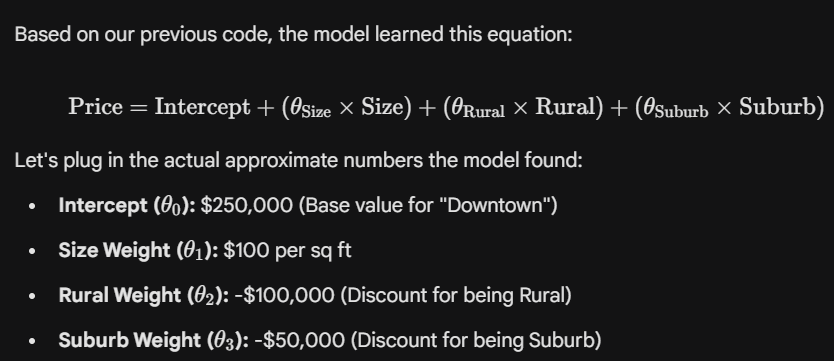

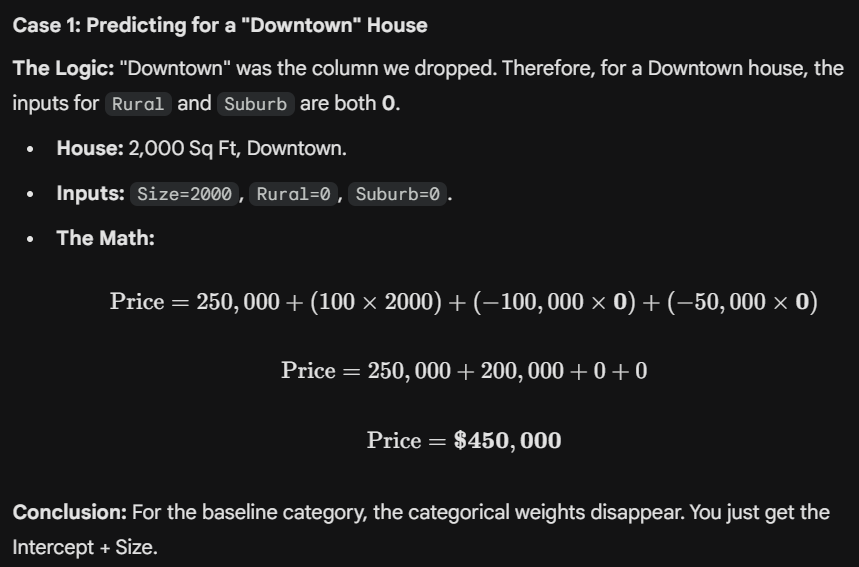

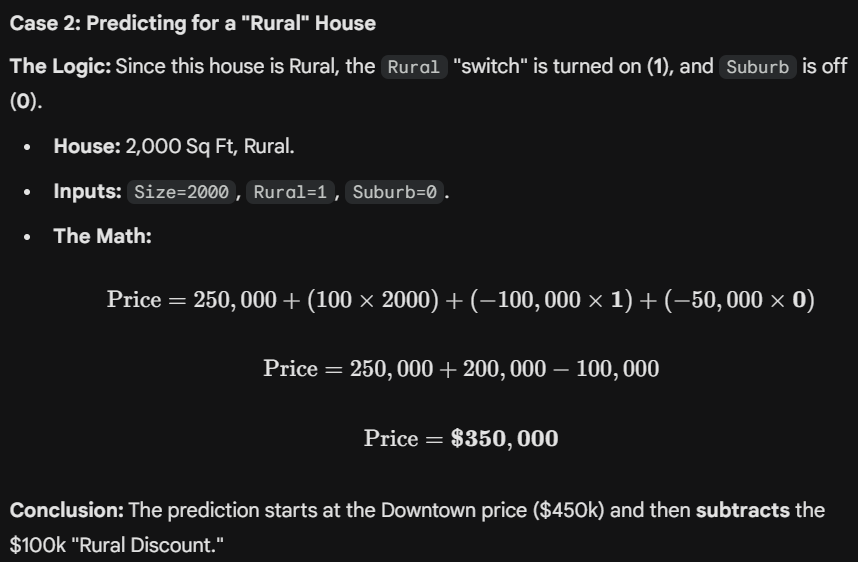